<a href="https://colab.research.google.com/github/ekanshi258/optimization-algos/blob/master/GA_Concrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This experiment applies Genetic Algorithm for applications in Civil Engineering

**Based on the paper:**   
Cost Optimization of No-Slump Concrete Using Genetic
Algorithm and Particle Swarm Optimization  
Hamed Naseri  
http://www.ijimt.org/vol10/832-CM0015.pdf 

**Some differences:** This code does not consider the need for a certain compressive strength range as mentioned in the paper. The only objective here is to reduce cost at the moment. **(Single Objective)**

In [ ]:
pip install geneticalgorithm

In [ ]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

Defining the objective function

based on the equation: 𝐶𝑜𝑠𝑡 = 𝑃C*𝐶 + 𝑃𝑆𝐹*𝑆𝐹 + 𝑃W*𝑊 + 𝑃𝐹𝐴*𝐹𝐴 + 𝑃𝐶𝐴*𝐶𝐴 + 𝑃𝐹i*𝐹i

In [ ]:
def costFunc(x):
  f = x[0]*1200 + x[1]*7000 + x[2]*150 + x[3]*200 + x[4]*120 + x[5]*280
  return f 

Setting the bounds and initializing the GA model

In [ ]:
bounds = np.array([[252.6, 410],[0, 27.3],[95, 139.7],[354.2, 1300],[600, 1440.6],[0, 188]])
model = ga(function=costFunc, dimension=6, variable_type='real', variable_boundaries=bounds)

In [10]:
model.run()

|||||||||||||||||||||||||||||||||||||_____________ 74.4% GA is running...Buffered data was truncated after reaching the output size limit.

In [12]:
model.output_dict

{'function': 460222.6370233852,
 'variable': array([2.52602025e+02, 7.44769235e-04, 9.50020192e+01, 3.54206550e+02,
        6.00026289e+02, 8.09439089e-04])}

The above output shows that the optimal cost found by GA is `460222.64` Iranian rials, with weights of each material as follows:
`[2.52602025e+02, 7.44769235e-04, 9.50020192e+01, 3.54206550e+02, 6.00026289e+02, 8.09439089e-04]`

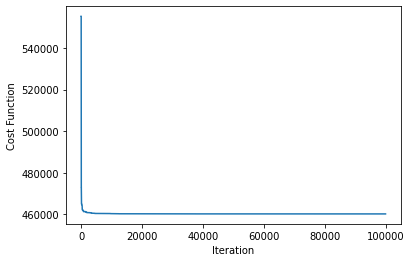

In [18]:
import matplotlib.pyplot as plt
plt.plot(model.report)
plt.ylabel('Cost Function')
plt.xlabel('Iteration')
plt.show()

**Observations:**

The optimal price of the mix found by GA is lower than that found by PSO (491066.47 IRR). However, the ratios of the material differ quite a bit, which shows that anothe robjective function will be required to contraint the ratios. 

Therefore, this would not be a good single-objective problem and definitely requires multiobjective optimization